In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [4]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [5]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [6]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [7]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [8]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month
0,2021-09-01,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,2021.750000
1,2022-05-01,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,2022.416667
2,2022-10-01,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,2022.833333
3,2021-08-01,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,2021.666667
4,2022-11-01,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,2022.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09-01,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200,2021,2021.750000
59996,2023-04-01,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100,2023,2023.333333
59997,2022-06-01,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250,2022,2022.500000
59998,2023-01-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700,2023,2023.083333


In [9]:
df_train.describe()

,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,rent_approval_year,rent_approval_month
count,60000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000
mean,2022-03-20 00:57:57.599999744,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333,2021.813050,2022.299508
min,2021-01-01 00:00:00,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000,2021.000000,2021.083333
25%,2021-08-01 00:00:00,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000,2021.000000,2021.666667
50%,2022-03-01 00:00:00,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000,2022.000000,2022.250000
75%,2022-12-01 00:00:00,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000,2022.000000,2023.000000
max,2023-07-01 00:00:00,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000,2023.000000,2023.583333
std,NaN,24.082642,12.141435,0.042505,0.071627,0.0,714.910468,0.780006,0.758707


In [10]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


In [11]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

In [12]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin, df_train_):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train_.groupby('town')['monthly_rent'].std()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else -1)

    #map block decrease order
    grouby_block = df_train_.groupby('block')['monthly_rent'].std()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else -1)

    #map flat_type decrease order
    grouby_flat_type = df_train_.groupby('flat_type')['monthly_rent'].std()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else -1)

    #map flat_model decrease order
    grouby_flat_model = df_train_.groupby('flat_model')['monthly_rent'].std()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else -1)

    #map planning_area decrease order
    grouby_planning_area = df_train_.groupby('planning_area')['monthly_rent'].std()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else -1)

    #map region decrease order
    grouby_region = df_train_.groupby('region')['monthly_rent'].std()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else -1)

    #map street_name decrease order
    grouby_street_name = df_train_.groupby('street_name')['monthly_rent'].std()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else -1)

    #map subzone decrease order
    grouby_subzone = df_train_.groupby('subzone')['monthly_rent'].std()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else -1)

    '''
    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train_.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())
    '''
    
    

    return df

In [13]:
#add KNN feature
from sklearn.neighbors import KNeighborsRegressor



def add_KNN_feature(df_origin, df_pos, K: int):
    KNN_X = df_pos[['latitude', 'longitude']]
    KNN_X['latitude'] *= 2
    KNN_y = df_pos['monthly_rent']

    KNN_model = KNeighborsRegressor(n_neighbors=K)
    KNN_model.fit(KNN_X, KNN_y)

    KNN_y2 = KNN_y ** 2
    KNN_model2 = KNeighborsRegressor(n_neighbors=K)
    KNN_model2.fit(KNN_X, KNN_y2)

    predict_X = df_origin[['latitude', 'longitude']]
    predict_X['latitude'] *= 2
    predict_y = KNN_model.predict(predict_X)
    predict_y2 = KNN_model2.predict(predict_X)
    df = df_origin.copy()
    #use std to be the feature
    df['K=' + str(K) + ' KNN'] = np.sqrt(predict_y2 - predict_y ** 2)

    return df

## try with attributes with KNN_feature
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* KNN_feature
* price
## with method
* xgboost
* lgbm

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [38]:
def data_preprocess(df, df_train_):
    df = df.copy()
    df_train_ = df_train_.copy()

    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    
    #normalize by date
    means = df_train_.groupby('rent_approval_date')['monthly_rent'].mean()
    stds = df_train_.groupby('rent_approval_date')['monthly_rent'].std()

    #df['date_mean'] = df['rent_approval_date'].apply(lambda x: means[x])
    #df['date_std'] = df['rent_approval_date'].apply(lambda x: stds[x])

    df['monthly_rent'] = df.apply(lambda x: (x['monthly_rent'] - means[x['rent_approval_date']]) / stds[x['rent_approval_date']], axis=1)
    df_train_['monthly_rent'] = df_train_.apply(lambda x: (x['monthly_rent'] - means[x['rent_approval_date']]) / stds[x['rent_approval_date']], axis=1)
    #normalize monthly rent by date
    
    #add coe price
    df = df.copy()
    df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
    month_to_numeric = {
        'january': 1,
        'february': 2,
        'march': 3,
        'april': 4,
        'may': 5,
        'june': 6,
        'july': 7,
        'august': 8,
        'september': 9,
        'october': 10,
        'november': 11,
        'december': 12
    }

    df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
    df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

    df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
    df_coe = df_coe[['date', 'price']]
    avg_price_bids_quota = df_coe.groupby('date').mean().reset_index()

    df['coe_price'] = df['rent_approval_date'].apply(lambda x: avg_price_bids_quota[avg_price_bids_quota['date'] == x]['price'].values[0])

    

    df = category_map_mean(df, df_train_)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    
    
    for K in [16, 32, 64]:
        df = add_KNN_feature(df, df_train_, K)
    
    

    for col in df.columns:
        #change -1 to KNN K=8
        if df[col].dtype == 'float64':
            df[col] = df[col].apply(lambda x: df[col][df[col] != -1].mean() if x == -1 else x)
    
    
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_approval_date'] = pd.to_datetime(df['rent_approval_date']).astype('int64')
    #df.drop(['rent_approval_date'], axis=1, inplace=True)
    #df.drop(['block'], axis=1, inplace=True)

    return df

In [33]:
from scipy.stats import zscore
def handle_outliers(group, attribute):
    z_scores = zscore(group[attribute])
    threshold = 3 
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    print(len(outlier_indices))
    return group[(z_scores < threshold)]  

In [39]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [36]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [19]:
# handle outlier
grouped = df_train.groupby('rent_approval_date', group_keys=False)
df_train = grouped.apply(handle_outliers, attribute='monthly_rent')
df_train.reset_index(drop=True, inplace=True)

16
6
16
12
15
6
13
9
6
6
8
13
3
2
5
9
11
6
17
1
15
10
5
5
7
7
5
9
5
7
7


In [43]:
ds_train_processed = data_preprocess(df_train, df_train)
#ds_test_processed = data_preprocess(df_test, df_train)
ds_train_processed

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent,coe_price,K=32 KNN,K=64 KNN
0,1630454400000000000,1.029410,0.997714,0.913849,0.693868,0.840715,67.0,1983,0.979759,1.029410,0.987878,-1.512575,54951.625,0.821282,0.963212
1,1651363200000000000,0.922204,0.832647,0.778066,0.939414,0.840715,92.0,1978,0.876636,0.922204,0.921594,-0.478083,77035.625,0.783190,0.930062
2,1664582400000000000,1.037610,0.770001,0.980023,0.693868,0.994978,67.0,1971,1.129767,1.037610,1.156501,-1.319147,89580.250,0.654074,0.996185
3,1627776000000000000,0.851748,0.887468,0.866991,0.963095,0.952791,149.0,1993,0.843008,0.851748,0.921594,1.431868,51997.375,0.752167,0.778162
4,1667260800000000000,1.029071,0.879574,0.461667,0.693868,0.994978,68.0,1972,1.003085,1.021840,1.156501,-1.119148,99472.875,0.515608,0.702871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1630454400000000000,0.894098,0.779191,0.852477,0.693868,0.840715,67.0,1979,0.859736,0.894098,0.890649,-0.080951,54951.625,0.747114,0.805911
59996,1680307200000000000,1.189953,0.117319,0.947696,0.939414,0.991668,83.0,2019,0.938335,1.189953,1.156501,1.167183,104404.750,0.944765,1.221815
59997,1654041600000000000,0.907808,0.834095,0.924783,0.961278,0.994978,122.0,1988,0.895760,0.907808,0.921594,-0.565723,83323.125,0.787004,0.742546
59998,1672531200000000000,0.922204,0.990516,0.940976,0.961278,1.114417,123.0,1977,0.859385,0.922204,0.921594,2.002971,92845.000,1.028791,0.973929


In [21]:
# attributes = ds_train_processed.keys()[ds_train_processed.keys() != 'rent_approval_date']
# grouped = ds_train_processed.groupby('rent_approval_date')
# for attribute in attributes:
#     ds_train_processed = grouped.apply(handle_outliers, attribute=attribute)

In [22]:
ds_train_processed.describe()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent,coe_price,K=16 KNN,K=32 KNN,K=64 KNN
count,59795.000000,59661.000000,59790.000000,59795.000000,59795.000000,59795.000000,59795.000000,59795.000000,59795.000000,59795.000000,5.979500e+04,59795.000000,59795.000000,59795.000000,59795.000000
mean,0.963791,0.915213,0.889078,0.867765,0.958272,94.422686,1990.840940,0.920236,0.962876,0.983910,1.930984e-17,75185.622197,0.779483,0.827687,0.864197
std,0.095152,0.179228,0.126985,0.109853,0.067697,24.075897,12.124255,0.091129,0.094905,0.090305,9.997491e-01,21312.333087,0.183178,0.150181,0.127532
min,0.852063,0.007746,0.054885,0.707948,0.581345,34.000000,1966.000000,0.482682,0.852063,0.902246,-4.577843e+00,43812.000000,0.261074,0.407629,0.510677
25%,0.898914,0.822239,0.814611,0.707948,0.910694,73.000000,1981.000000,0.862636,0.898914,0.911212,-7.158524e-01,52199.625000,0.652246,0.724118,0.775385
50%,0.935145,0.917223,0.875549,0.943659,0.996458,93.000000,1988.000000,0.908154,0.935145,0.934136,-7.932483e-02,77035.625000,0.759515,0.813117,0.849717
75%,1.024774,1.017490,0.958320,0.944396,1.001493,110.000000,2000.000000,0.966486,1.024774,0.990846,6.510527e-01,96230.250000,0.888010,0.915246,0.938066
max,1.241351,2.383072,1.990688,0.949788,1.966476,192.000000,2019.000000,1.467464,1.237709,1.137934,3.090164e+00,105592.375000,1.706948,1.503774,1.581277


In [23]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [44]:
means = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
stds = df_train.groupby('rent_approval_date')['monthly_rent'].std()

In [45]:
X = ds_train_processed.drop(['monthly_rent'], axis=1)
#X.drop(['rent_approval_date'], axis=1, inplace=True)
y = ds_train_processed['monthly_rent']

real_y = df_train['monthly_rent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
real_X_train, real_X_test, real_y_train, real_y_test = train_test_split(df_train, real_y, test_size=0.3, random_state=42)

xgb_model = LGBMRegressor()
best_params = {
    'n_estimators': 1052, 'num_leaves': 21, 'min_child_samples': 8, 'learning_rate': 0.02902024994402161, 'log_max_bin': 5, 'colsample_bytree': 0.4268724784655216, 'reg_alpha': 0.060915065745748224, 'reg_lambda': 0.001608100397836659
}
best_params = {
    'n_estimators': 565, 'num_leaves': 108, 'min_child_samples': 4, 'learning_rate': 0.020170771426449637, 'log_max_bin': 5, 'colsample_bytree': 0.4355394904589456, 'reg_alpha': 0.006669404776891505, 'reg_lambda': 0.0014102577057029872
}


xgb_model.set_params(**best_params)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

y_pred = y_pred * stds[real_X_test['rent_approval_date']] + means[real_X_test['rent_approval_date']]

print('LGBM MAE: ', mean_absolute_error(real_y_test, y_pred))
print('LGBM RMSE: ', mean_squared_error(real_y_test, y_pred, squared=False))



[LightGBM] [Warning] Unknown parameter: log_max_bin
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: log_max_bin
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 14
[LightGBM] [Info] Start training from score -0.001630
[LightGBM] [Warning] Unknown parameter: log_max_bin
LGBM MAE:  363.8670631998501
LGBM RMSE:  483.3712317741634


In [52]:
#submission
model = LGBMRegressor()
model.set_params(**best_params)

model.fit(X, y)
df_test['monthly_rent'] = 0

ds_test_processed = data_preprocess(df_test, df_train)
ds_test_processed.drop(['monthly_rent'], axis=1, inplace=True)
#ds_test_processed.drop(['rent_approval_date'], axis=1, inplace=True)
y_pred = model.predict(ds_test_processed)

y_pred = y_pred * stds[df_test['rent_approval_date']] + means[df_test['rent_approval_date']]
y_pred.reset_index(drop=True, inplace=True)
submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = y_pred
submission.to_csv('submission.csv', index=False)

[LightGBM] [Warning] Unknown parameter: log_max_bin
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: log_max_bin
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 14
[LightGBM] [Info] Start training from score -0.000000


C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

[LightGBM] [Warning] Unknown parameter: log_max_bin


In [47]:
#tuning with FLAML
from flaml import AutoML

automl = AutoML()
automl_settings = {
    "time_budget": 600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": 'lightGBM-600.log',
    "eval_method": 'cv',
    "n_splits": 4,
    "estimator_list": ['lgbm'],
}

automl.fit(X_train=X, y_train=y, **automl_settings)

[flaml.automl.logger: 10-20 23:34:49] {1679} INFO - task = regression
[flaml.automl.logger: 10-20 23:34:49] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-20 23:34:49] {1788} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 10-20 23:34:49] {1900} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-20 23:34:49] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-20 23:34:50] {2344} INFO - Estimated sufficient time budget=3401s. Estimated necessary time budget=3s.
[flaml.automl.logger: 10-20 23:34:50] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.9206,	best estimator lgbm's best error=0.9206
[flaml.automl.logger: 10-20 23:34:50] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-20 23:34:50] {2391} INFO -  at 0.8s,	estimator lgbm's best error=0.9206,	best estimator lgbm's best error=0.9206
[flaml.automl.logger: 10-20 23:34:50] {2218} INFO - iteration 2, current learner lgbm
[flaml.automl.lo

In [48]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)

Best hyperparmeter config: {'n_estimators': 1330, 'num_leaves': 80, 'min_child_samples': 15, 'learning_rate': 0.013006809721387439, 'log_max_bin': 8, 'colsample_bytree': 0.4912347721649633, 'reg_alpha': 0.0037590287353513356, 'reg_lambda': 0.011300028192973858}
Best r2 on validation data: 0.2216
Training duration of best run: 13.17 s
LGBMRegressor(colsample_bytree=0.4912347721649633,
              learning_rate=0.013006809721387439, max_bin=255,
              min_child_samples=15, n_estimators=1, n_jobs=-1, num_leaves=80,
              reg_alpha=0.0037590287353513356, reg_lambda=0.011300028192973858,
              verbose=-1)


In [28]:
#use FLAML regression to train and predict
from flaml import AutoML

automl = AutoML()
automl_settings = {
    "time_budget": 600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": 'cs5228-auto.log',
    "eval_method": 'cv',
}

automl.fit(X_train=X, y_train=y, **automl_settings)

print('Best hyperparmeter config:', automl.best_config)

print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))

[flaml.automl.logger: 10-20 23:16:29] {1679} INFO - task = regression
[flaml.automl.logger: 10-20 23:16:29] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 10-20 23:16:29] {1788} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 10-20 23:16:29] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 10-20 23:16:29] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-20 23:16:29] {2344} INFO - Estimated sufficient time budget=3774s. Estimated necessary time budget=32s.
[flaml.automl.logger: 10-20 23:16:29] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.9229,	best estimator lgbm's best error=0.9229
[flaml.automl.logger: 10-20 23:16:29] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-20 23:16:30] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.9229,	best estimator lgbm's best error=0.9229
[flaml.automl.logger: 10-20 23:16:30] {2

In [53]:
#submit with FLAML
df_test['monthly_rent'] = 0

ds_test_processed = data_preprocess(df_test, df_train)
ds_test_processed.drop(['monthly_rent'], axis=1, inplace=True)
#ds_test_processed.drop(['rent_approval_date'], axis=1, inplace=True)
y_pred = automl.predict(ds_test_processed)

y_pred = y_pred * stds[df_test['rent_approval_date']] + means[df_test['rent_approval_date']]
y_pred.reset_index(drop=True, inplace=True)
submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = y_pred
submission.to_csv('submission.csv', index=False)

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_46776\1387371949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
#tuning parameters split by year with grid search
from sklearn.model_selection import GridSearchCV



n_estimators = np.arange(3000, 4100, 100)
learning_rate = np.arange(0.001, 0.005, 0.0005)

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
lgb_model = LGBMRegressor()
grid_search = GridSearchCV(lgb_model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=3, verbose=1)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))





    
    



Fitting 3 folds for each of 88 candidates, totalling 264 fits


KeyboardInterrupt: 

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_38280\1055011260.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_y_test, hist=False, label='y_val')
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_38280\1055011260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_

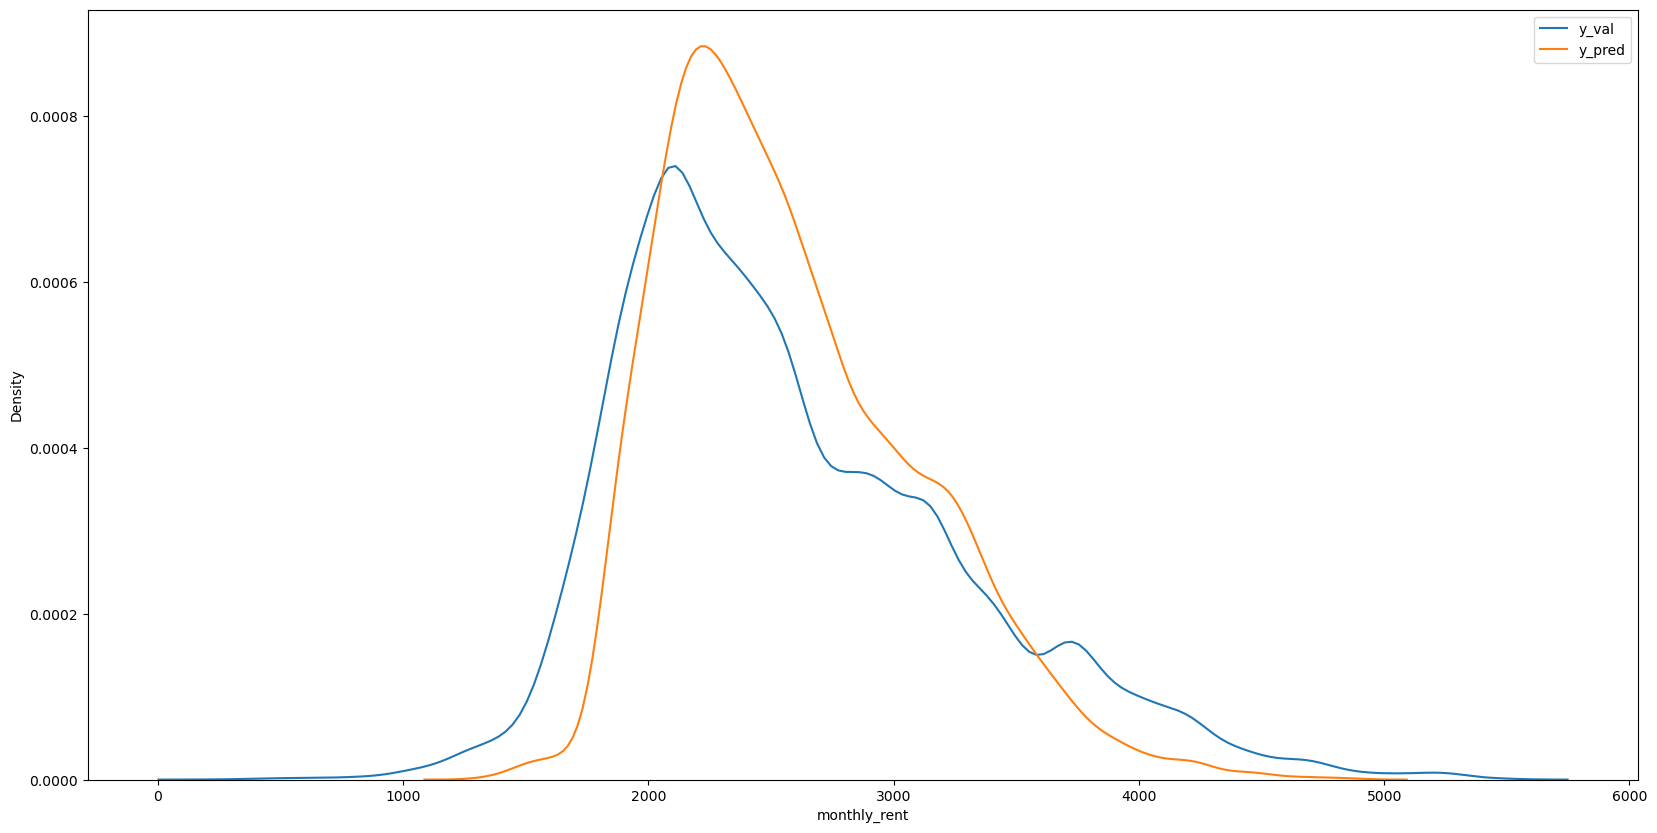

In [ ]:
#plot distribution from predcit and real
plt.figure(figsize=(20, 10))
sns.distplot(real_y_test, hist=False, label='y_val')
sns.distplot(y_pred, hist=False, label='y_pred')
plt.legend()
plt.show()